# Open, Plot and Explore Raster Data with Python (practice)

Within my practice on raster data in geospatial, i've found a best way to create your own raster image with google earth online. My goal was to visualize the district of 'Malika' in Dakar, Senegal. 

The goal of this practical tutorial is:\
    Open, plot, and explore raster data using Python.\
    Handle no data values in raster data.\
    Create plotting extents so you can plot raster and vector data together using matplotlib.\
    Explore raster data using histograms and descriptive statistics.\


In [100]:
import rasterio

In [101]:
image = 'D:/Research/PROJECT/pyexeriences/Geospatial experiences/Raster data analysis/data/district_malika..tif'


In [102]:
dataset = rasterio.open('D:/Research/PROJECT/pyexeriences/Geospatial experiences/Raster data analysis/data/district_malika.tif'
)

In [103]:
dataset.name

'D:/Research/PROJECT/pyexeriences/Geospatial experiences/Raster data analysis/data/district_malika.tif'

In [104]:
dataset.mode

'r'

In [105]:
# Checking the dataset attributes
dataset.count

4

We have 4 bands in this dataset. band is an array of values representing the partial distribution of a single variable in 2-dimensional (2D) space. All band arrays of a dataset have the same number of rows and columns(rasterio).

In [106]:
print(dataset.width);
print(dataset.height)

1087
631


In [107]:
print(dataset.indexes)

(1, 2, 3, 4)


In [108]:
print(dataset.dtypes)

('uint8', 'uint8', 'uint8', 'uint8')


## Georeferencing of our Dataset

Our dataset is a satelite image picked from google earth website. It's a location on earth which make it different from an ordinary image.band is an array of values representing the partial distribution of a single variable in 2-dimensional (2D) space. All band arrays of a dataset have the same number of rows and columns.

In [109]:
print(dataset.transform) 

| 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|


A dataset’s transform is an affine transformation matrix that maps pixel locations in (row, col) coordinates to (x, y) spatial positions.

In [110]:
print(dataset.crs)

None


In [198]:
samba = rasterio.open(image, 'r
                      ')

RasterioIOError: D:/Research/PROJECT/pyexeriences/Geospatial experiences/Raster data analysis/data/district_malika..tif: No such file or directory

In [184]:
dataset.crs = {'init': 'EPSG:3857'}

DatasetAttributeError: read-only attribute

In [111]:
dataset.shape

(631, 1087)

In [112]:
band_1 = dataset.read(1)

In [113]:
band_1

array([[ 10,  10,  12, ..., 185, 193, 193],
       [ 19,  19,  19, ..., 180, 193, 195],
       [ 24,  23,  23, ..., 194, 198, 198],
       ...,
       [221, 214, 210, ..., 189, 196, 202],
       [222, 219, 217, ..., 181, 190, 202],
       [209, 212, 214, ..., 181, 189, 204]], dtype=uint8)

In [177]:
band_1.shape

(631, 1087)

The returned object is a 2-dimensional Numpy ndarray.

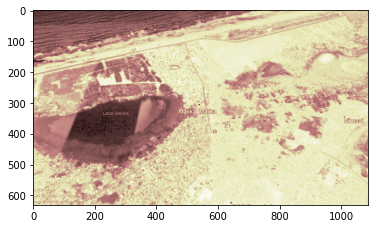

In [178]:
plt.imshow(band_1, cmap='pink')


All bands of the input dataset can be read into a 3-dimensonal ndarray. Note that the interpretation of the 3 axes is (bands, rows, columns)

In [181]:
array = dataset.read()
array.shape

(4, 631, 1087)

In [183]:
for i, dtype, nodataval in zip(dataset.indexes, dataset.dtypes, dataset.nodatavals):
    print(i, dtype, nodataval)

1 uint8 None
2 uint8 None
3 uint8 None
4 uint8 None


In [114]:
band_2 = dataset.read(2)

In [115]:
band_2

array([[ 36,  36,  38, ..., 159, 165, 161],
       [ 45,  45,  45, ..., 154, 166, 166],
       [ 52,  51,  51, ..., 168, 171, 169],
       ...,
       [202, 195, 191, ..., 180, 187, 193],
       [203, 200, 198, ..., 172, 181, 193],
       [190, 193, 195, ..., 172, 180, 195]], dtype=uint8)

In [116]:
print(len(band_1));
print(len(band_2))

631
631


In [117]:
dataset.bounds

BoundingBox(left=0.0, bottom=631.0, right=1087.0, top=0.0)

In [118]:
from rasterio import plot as rioplot

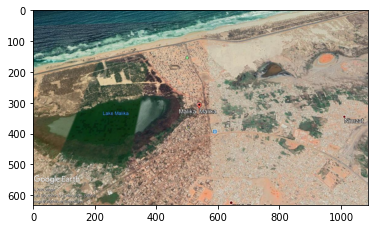

<AxesSubplot:>

In [119]:
rioplot.show(dataset, cmap='hot')

In [122]:
dataset.bounds

BoundingBox(left=0.0, bottom=631.0, right=1087.0, top=0.0)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1087, 'height': 631, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}


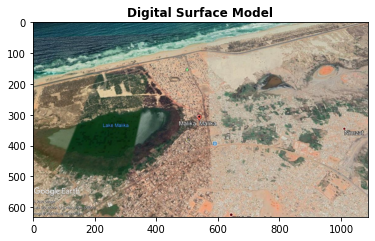

<AxesSubplot:title={'center':'Digital Surface Model'}>

In [127]:
import rasterio
from rasterio.plot import show
DSM = rasterio.open('D:/Research/PROJECT/pyexeriences/Geospatial experiences/Raster data analysis/data/district_malika.tif'
, driver="GTiff")
#DTM = rasterio.open("./data/AHN2_05m_DTM.tif", driver="GTiff")
print(DSM.meta)
#print(DTM.meta)
show(DSM, title='Digital Surface Model', cmap='gist_ncar')

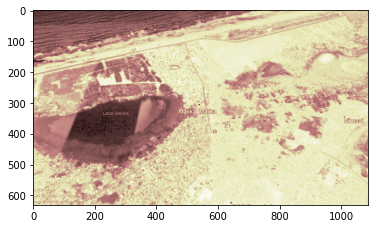

In [131]:
from matplotlib import pyplot
pyplot.imshow(dataset.read(1), cmap='pink')

In [132]:
from rasterio.plot import show

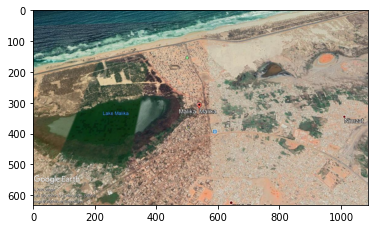

<AxesSubplot:>

In [134]:
# To get extent labels
show(dataset.read(), transform=dataset.transform)

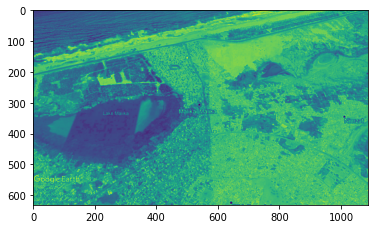

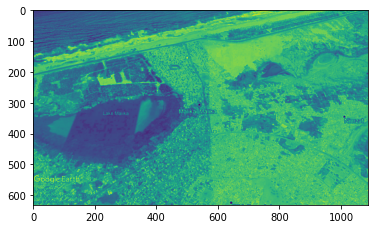

<AxesSubplot:>

In [137]:
show((dataset, 2), cmap='viridis')
show(dataset.read(2), transform=dataset.transform, cmap='viridis')

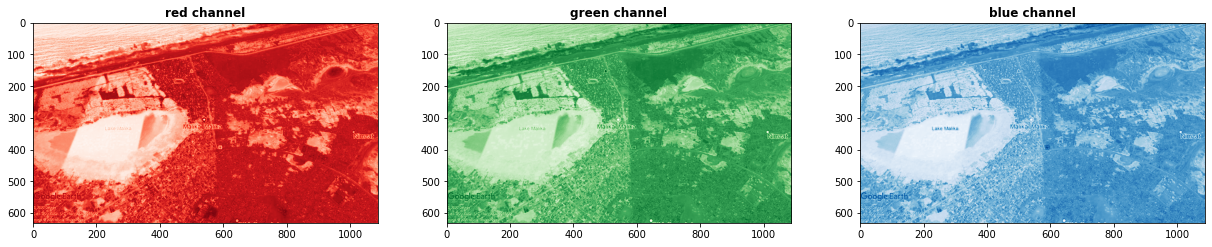

In [138]:
 fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
 show((dataset, 1), ax=axr, cmap='Reds', title='red channel')
 show((dataset, 2), ax=axg, cmap='Greens', title='green channel')
 show((dataset, 3), ax=axb, cmap='Blues', title='blue channel')
 pyplot.show()

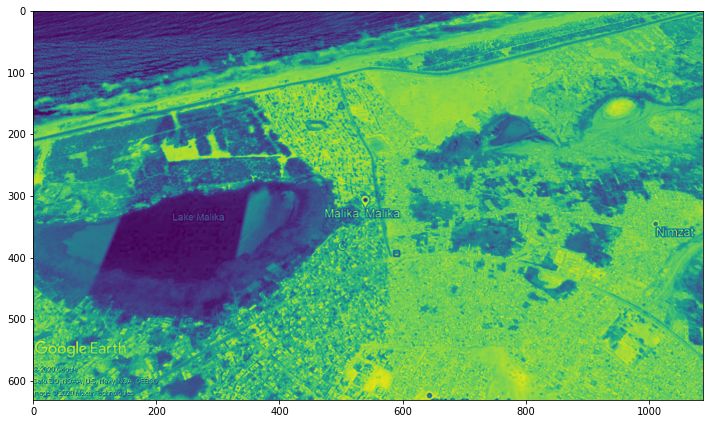

In [143]:
 fig, ax = pyplot.subplots(1, figsize=(12, 12))
 show((dataset, 1), cmap='terrain', interpolation='none', ax=ax)
 show((dataset, 1), ax=ax)
 pyplot.show()

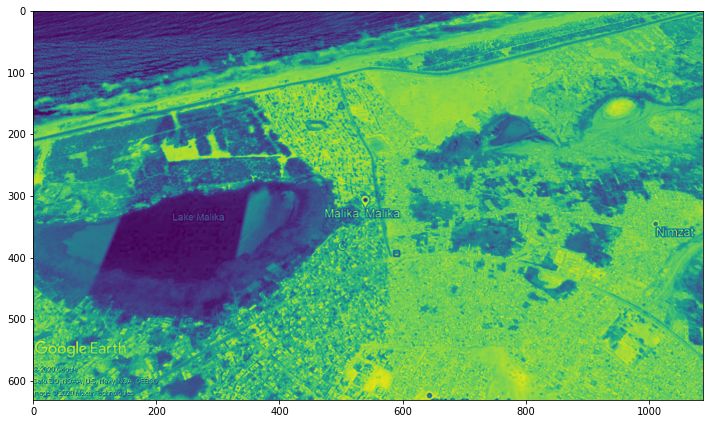

In [149]:
fig, ax = pyplot.subplots(1, figsize=(12, 12))
show((dataset, 1), cmap='CMRmap', ax=ax)
show((dataset, 1), ax=ax)
pyplot.show()

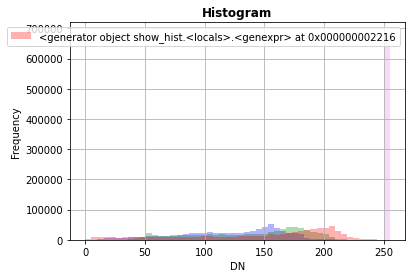

In [150]:
from rasterio.plot import show_hist
show_hist(dataset, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

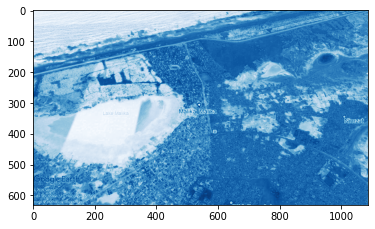

<AxesSubplot:>

In [159]:
mir = dataset.read(1).astype(float)

np.seterr(divide='ignore', invalid='ignore')  # Allow division by zero
mndwi = np.empty(dataset.shape, dtype=rasterio.float32)  # Create empty matrix
show(mir, cmap='Blues')

In [160]:
mir

array([[ 10.,  10.,  12., ..., 185., 193., 193.],
       [ 19.,  19.,  19., ..., 180., 193., 195.],
       [ 24.,  23.,  23., ..., 194., 198., 198.],
       ...,
       [221., 214., 210., ..., 189., 196., 202.],
       [222., 219., 217., ..., 181., 190., 202.],
       [209., 212., 214., ..., 181., 189., 204.]])

In [ ]:
ax = neighborhoods.geometry.plot(color='lightblue', alpha=.75, edgecolor='k')
neighborhoods.geometry[[0]].plot(color='limegreen', ax=ax, alpha=.75, edgecolor='k')
ax.imshow(austin_nightlights, extent=austin_bbox[[0,2,1,3]], cmap='hot')

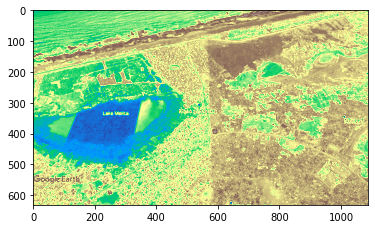

<AxesSubplot:>

In [170]:
show((dataset, 3), cmap='terrain')


In [173]:
dataset.scales

(1.0, 1.0, 1.0, 1.0)

In [174]:
dataset.driver

'GTiff'

In [176]:
print(dataset.nodata)

None


In [202]:
import rioxarray as rxr
# Open the data and mask no data values
# Squeeze reduces the third dimension given there is only one "band" or layer to this data
dtm_pre_arr = rxr.open_rasterio('D:\Research\PROJECT\pyexeriences\Geospatial experiences\Raster data analysis\data\district_malika.tif', masked=True).squeeze()
# Notice there are now only 2 dimensions to your array
dtm_pre_arr.shape

d:\programm files\python 3 8 6\lib\site-packages\rioxarray\_io.py:678: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))


(4, 631, 1087)

In [203]:
dtm_pre_arr

<xarray.DataArray (band: 4, y: 631, x: 1087)>
[2743588 values with dtype=float64]
Coordinates:
  * band         (band) int32 1 2 3 4
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 627.5 628.5 629.5 630.5
  * x            (x) float64 0.5 1.5 2.5 3.5 ... 1.084e+03 1.086e+03 1.086e+03
    spatial_ref  int32 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [204]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dtm_pre_arr.rio.crs)
print("The spatial extent is:", dtm_pre_arr.rio.bounds())

The CRS for this data is: None
The spatial extent is: (0.0, 631.0, 1087.0, 0.0)


(array([ 59812., 100699., 187885., 224087., 250702., 306787., 443612.,
        349185., 126308., 694511.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

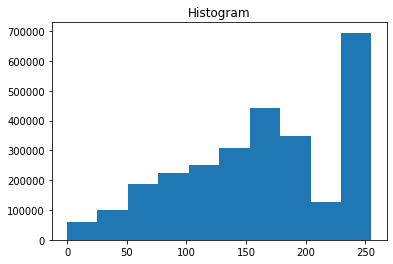

In [205]:
dtm_pre_arr.plot()

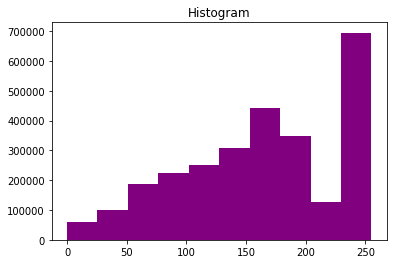

In [206]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?
dtm_pre_arr.plot.hist(color="purple")
plt.show()

In [207]:
print("the minimum raster value is: ", np.nanmin(dtm_pre_arr.values))
print("the maximum raster value is: ", np.nanmax(dtm_pre_arr.values))

the minimum raster value is:  0.0
the maximum raster value is:  255.0


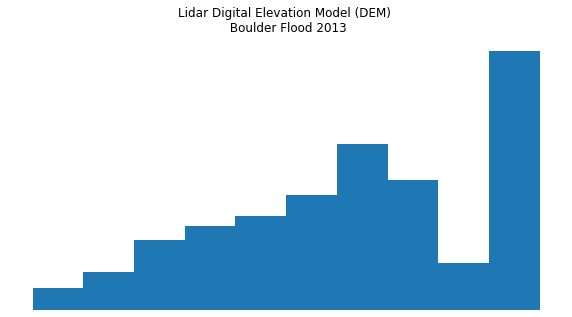

In [209]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(ax=ax)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

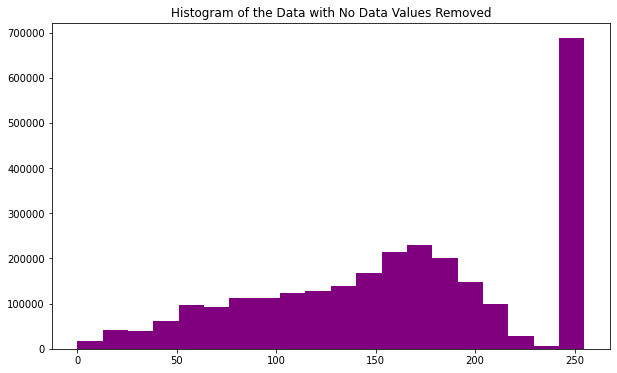

In [210]:
f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color="purple",
                      bins=20)
ax.set_title("Histogram of the Data with No Data Values Removed")
plt.show()

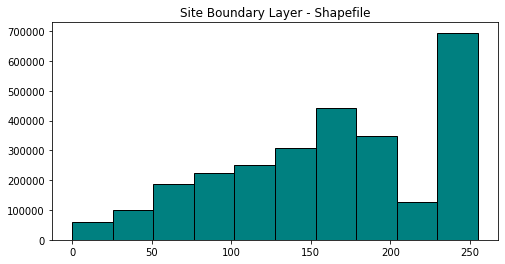

In [212]:
# Plot the vector data
f, ax = plt.subplots(figsize=(8,4))
dtm_pre_arr.plot(color='teal',
                    edgecolor='black',
                    ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()